In [59]:
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [60]:
df=pd.read_csv("mushroom_classification.csv")

In [61]:
df.isna().sum()

cap_diameter       0
cap_shape          0
gill_attachment    0
gill_color         0
stem_height        0
stem_width         0
stem_color         0
season             0
class              0
dtype: int64

In [62]:
df.head(3)

,cap_diameter,cap_shape,gill_attachment,gill_color,stem_height,stem_width,stem_color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [63]:
df.shape

(54035, 9)

In [64]:
df.groupby("class")[["cap_diameter","stem_height","stem_width"]].mean()

,cap_diameter,stem_height,stem_width
class,,,
0,633.064696,0.627374,1208.915189
1,513.236293,0.867251,921.516563


In [65]:
features_to_analyze=["cap_diameter","stem_height","stem_width"]

<Figure size 1200x600 with 0 Axes>

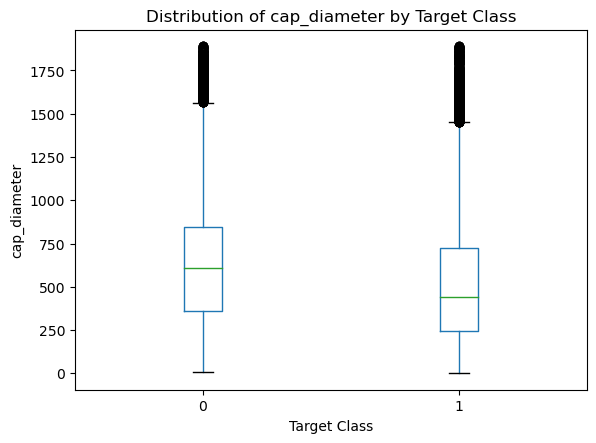

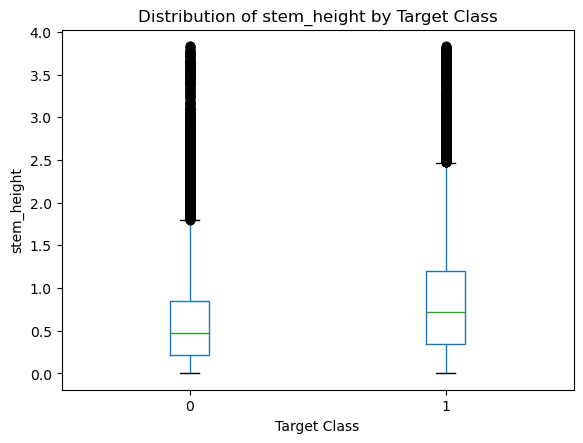

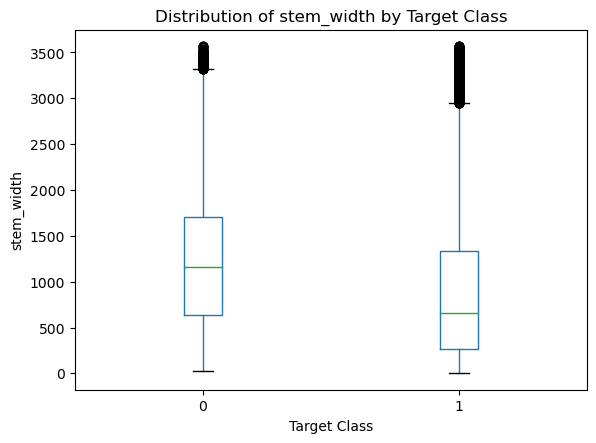

In [66]:
plt.figure(figsize=(12, 6))
for feature in features_to_analyze:
    df.boxplot(column=feature, by='class', grid=False)
    plt.title(f'Distribution of {feature} by Target Class')
    plt.suptitle('')  # Suppress the default title to avoid overlap
    plt.xlabel('Target Class')
    plt.ylabel(feature)
    plt.show()

In [67]:
X=df.drop("class",axis=1)

In [68]:
y=df["class"]

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
model=LogisticRegression()

In [73]:
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
y_preds=model.predict(X_test)

In [75]:
from sklearn.metrics import classification_report

In [76]:
report=classification_report(y_test,y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.61      0.55      0.58      6130
           1       0.65      0.71      0.68      7379

    accuracy                           0.64     13509
   macro avg       0.63      0.63      0.63     13509
weighted avg       0.63      0.64      0.63     13509



In [77]:
from sklearn.tree import DecisionTreeClassifier

In [78]:
model_dt=DecisionTreeClassifier()

In [79]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
y_preds_dt=model_dt.predict(X_test)

In [81]:
report_dt=classification_report(y_test,y_preds_dt)

In [82]:
print(report_dt)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      6130
           1       0.98      0.98      0.98      7379

    accuracy                           0.98     13509
   macro avg       0.98      0.98      0.98     13509
weighted avg       0.98      0.98      0.98     13509



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

In [84]:
model_gb=GradientBoostingClassifier()

In [85]:
model_gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [86]:
y_pred_gb=model_gb.predict(X_test)

In [87]:
report_gd=classification_report(y_test,y_pred_gb)

In [88]:
print(report_gd)

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6130
           1       0.89      0.89      0.89      7379

    accuracy                           0.88     13509
   macro avg       0.88      0.88      0.88     13509
weighted avg       0.88      0.88      0.88     13509



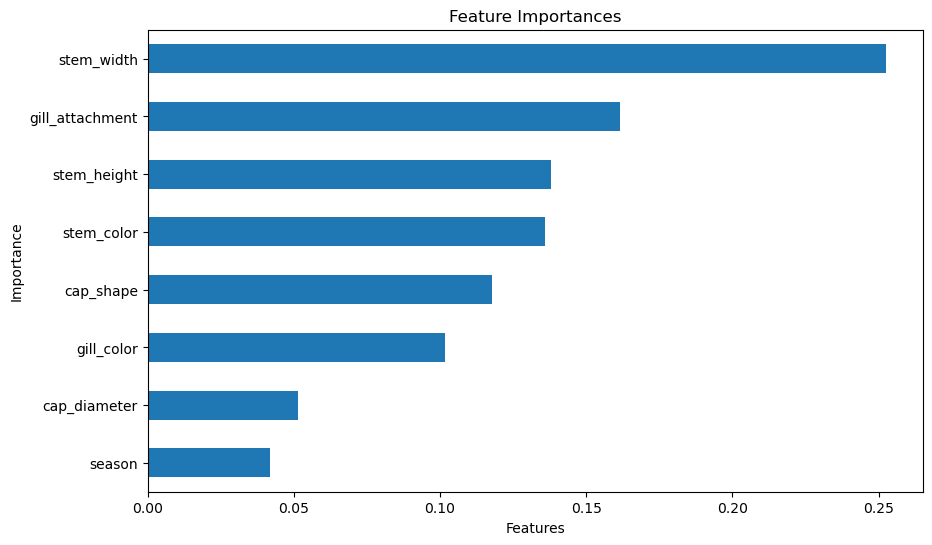

In [89]:
feature_importances = pd.Series(model_gb.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', figsize=(10, 6))
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

### Custom model Using Gradient_Boosting_Classifier

In [96]:
params={
"learning_rate" : 0.05,
"n_estimators" : 150,
"max_depth":4,
"min_samples_split" : 3,
"min_samples_leaf" : 2
    }

In [97]:
model_gb_cus=GradientBoostingClassifier(**params)

In [98]:
model_gb_cus.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.05, max_depth=4, min_samples_leaf=2,
                           min_samples_split=3, n_estimators=150)

In [99]:
y_pred_gb_cus=model_gb_cus.predict(X_test)

In [100]:
report_gd_cus=classification_report(y_test,y_pred_gb_cus)

In [101]:
print(report_gd_cus)

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      6130
           1       0.92      0.90      0.91      7379

    accuracy                           0.90     13509
   macro avg       0.90      0.91      0.90     13509
weighted avg       0.91      0.90      0.90     13509



Out of all models decision tree performed better.